In [155]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy.linalg as la
import pandas as pd
from scipy.linalg import svd
from mpl_toolkits.mplot3d import Axes3D
import random
from pipeline import generate_basic_exploration

In [156]:
df = pd.read_csv('allegations_cleaned2.csv')

In [157]:
# for x in df.columns:
#     print(x)

In [158]:
# # small subset 
# keep_vars = ['mos_gender','mos_age_incident','mos_hispanic','mos_black',
#              'mos_asian','mos_american_indian','complainant_age_incident','abuse_of_authority',
#             'offensive_language','discourtesy','force',"c_black","c_unknown","c_white","c_asian","c_hispanic",
# "c_american_indian",
# "c_female",
# "c_male",
# "c_transman_(ftm)",
# "c_transwoman_(mtf)",
# "c_gender_non-conforming","officer_id","outcome"]

In [159]:
# df = df[keep_vars]

In [160]:
#df[['closure_time']].hist()

In [161]:
df.describe()

,Unnamed: 0,rank_abbrev_incident,mos_gender,mos_age_incident,same_ethnicity,closure_time,demotion,promotion,rank_abbrev_now,dispute,...,Oriental,Sh Refuse Cmp,Slap,Police shield,White,Profane Gesture,Animal,Gender Identity,officer_id,outcome
count,33358.000000,33358.000000,33358.000000,33358.000000,33358.000000,33358.000000,33358.000000,33358.000000,33358.000000,33358.000000,...,33358.000000,33358.000000,33358.000000,33358.000000,33358.000000,33358.000000,33358.000000,33358.00000,33358.000000,33358.000000
mean,16678.500000,1.643894,0.052761,32.346873,0.202920,296.268721,0.009623,0.473769,2.848582,0.052521,...,0.000030,0.000150,0.000420,0.000330,0.000240,0.000090,0.000090,0.00012,18169.912495,-0.214251
std,9629.769476,1.280477,0.223559,6.040944,0.402179,152.703275,0.097625,0.499319,2.040424,0.223079,...,0.005475,0.012242,0.020482,0.018156,0.015485,0.009483,0.009483,0.01095,9566.316896,0.816125
min,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000,-1.000000
25%,8339.250000,1.000000,0.000000,28.000000,0.000000,183.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,9671.000000,-1.000000
50%,16678.500000,1.000000,0.000000,31.000000,0.000000,303.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,19215.000000,0.000000
75%,25017.750000,2.000000,0.000000,36.000000,0.000000,396.000000,0.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,25412.000000,0.000000
max,33357.000000,9.000000,1.000000,60.000000,1.000000,3348.000000,1.000000,1.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,36374.000000,1.000000


In [162]:
df.shape

(33358, 171)

In [163]:
# Group train/test by officer ID somehow? See Piazza post
def train_test_split(df,holdOut=0.2, randomState = 1):
    # Train, val, test split:
    # get number of unique ids and the uniqe IDs
    n_ID = len(df.officer_id.unique())
    ids = pd.DataFrame(df.officer_id.unique())

    # sample from IDs
    train_index = ids.sample(round(n_ID*(1-holdOut)),random_state = randomState ).values.tolist()
    #train_index = [item for sublist in train_index for item in sublist]
    train_index = [x[0] for x in train_index]
    # train data is data from any IDs that show up in train index
    train_data = df[df.officer_id.isin(train_index)]
    # test data is data from any IDs that don't show up in train index
    test_data = df[~df.officer_id.isin(train_index)]

    # Sanity check
    print("Total Number of Unique IDs:" , len(df.officer_id.unique()))
    print("Total Number of IDs in Test Data:" , len(test_data.officer_id.unique()))
    print("Total Number of IDs in Train Data:" , len(train_data.officer_id.unique()))
    print("Do the IDs add up?" , len(test_data.officer_id.unique()) + len(train_data.officer_id.unique())  ==  len(df.officer_id.unique()))
    print("Does Test Represent 20% of the data?", (len(test_data.officer_id.unique())/len(df.officer_id.unique())) == holdOut)
    print("Test Represents X% of the data:", (len(test_data.officer_id.unique())/len(df.officer_id.unique())))
    
    return train_data, test_data

In [164]:
train,test = train_test_split(df)

Total Number of Unique IDs: 3996
Total Number of IDs in Test Data: 799
Total Number of IDs in Train Data: 3197
Do the IDs add up? True
Does Test Represent 20% of the data? False
Test Represents X% of the data: 0.19994994994994994


In [165]:
train.columns

Index(['Unnamed: 0', 'rank_abbrev_incident', 'mos_gender', 'mos_age_incident',
       'same_ethnicity', 'closure_time', 'demotion', 'promotion',
       'rank_abbrev_now', 'dispute',
       ...
       'Oriental', 'Sh Refuse Cmp', 'Slap', 'Police shield', 'White',
       'Profane Gesture', 'Animal', 'Gender Identity', 'officer_id',
       'outcome'],
      dtype='object', length=171)

In [166]:
# construct type of FADO as outcome
# train['fado'] = np.nan
# train.loc[train['abuse_of_authority']==1,'fado']=1
# train.loc[train['discourtesy']==1,'fado']=2
# train.loc[train['offensive_language']==1,'fado']=3
# train.loc[train['force']==1,'fado']=4
# train.drop(['abuse_of_authority',"discourtesy",'offensive_language','force'],axis=1,inplace=True)

In [167]:
outcome_var = "outcome"

# first let's sort on outcome 
train = train.sort_values(by=outcome_var)
train.tail()

,Unnamed: 0,rank_abbrev_incident,mos_gender,mos_age_incident,same_ethnicity,closure_time,demotion,promotion,rank_abbrev_now,dispute,...,Oriental,Sh Refuse Cmp,Slap,Police shield,White,Profane Gesture,Animal,Gender Identity,officer_id,outcome
18054,18054,3.0,0.0,36.0,0.0,153.0,1.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25490,1.0
18065,18065,4.0,0.0,42.0,1.0,518.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25495,1.0
18084,18084,6.0,0.0,40.0,0.0,426.0,0.0,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25499,1.0
18087,18087,6.0,0.0,43.0,0.0,122.0,0.0,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25499,1.0
33357,33357,1.0,0.0,36.0,0.0,184.0,0.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9992,1.0


In [168]:
train.shape, 13945+12621

((26566, 171), 26566)

In [169]:
#train

In [170]:
outcome_breakdown = train.groupby([outcome_var])['mos_gender'].count()

In [171]:
outcome_breakdown

outcome
-1.0    12379
 0.0     7572
 1.0     6615
Name: mos_gender, dtype: int64

In [172]:
# let's take out just the features
train_features = train.drop(['officer_id',outcome_var,'Unnamed: 0','closure_time','demotion'],axis=1)
# train_features = train.drop(['officer_id',outcome_var],axis=1)
train_target = train[[outcome_var]]
train_features.head()

,rank_abbrev_incident,mos_gender,mos_age_incident,same_ethnicity,promotion,rank_abbrev_now,dispute,vehicle,suspected_violation,phone,...,Premise Searched,Arrest/D. A. T.,Oriental,Sh Refuse Cmp,Slap,Police shield,White,Profane Gesture,Animal,Gender Identity
26451,2.0,0.0,28.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21265,1.0,0.0,31.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30197,1.0,0.0,36.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11785,3.0,0.0,30.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11786,3.0,0.0,30.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [173]:
train_features.shape, train_target.shape

((26566, 166), (26566, 1))

In [174]:
U, S, VT = la.svd(np.array(train_features), full_matrices=False)

In [175]:
S

array([7.60535430e+03, 1.42114561e+03, 3.57037250e+02, 1.65824912e+02,
       1.14232369e+02, 1.07150407e+02, 9.06349820e+01, 8.85463653e+01,
       8.76014657e+01, 8.45396227e+01, 7.65323477e+01, 7.33619966e+01,
       6.45881030e+01, 6.14830990e+01, 5.32211676e+01, 5.27517824e+01,
       5.05062712e+01, 4.16691873e+01, 4.08065231e+01, 4.03549779e+01,
       3.97041372e+01, 3.80125568e+01, 3.75970315e+01, 3.73651525e+01,
       3.66100062e+01, 3.56187000e+01, 3.48899722e+01, 3.44767056e+01,
       3.32632637e+01, 3.28529217e+01, 3.15120428e+01, 3.08233079e+01,
       2.99929198e+01, 2.93243108e+01, 2.88638163e+01, 2.75958484e+01,
       2.74541459e+01, 2.65945985e+01, 2.45282837e+01, 2.42336967e+01,
       2.31791074e+01, 2.27790828e+01, 2.18430183e+01, 2.08853090e+01,
       2.05030611e+01, 2.01414136e+01, 1.99205379e+01, 1.91389198e+01,
       1.85108482e+01, 1.81696151e+01, 1.72476410e+01, 1.63594991e+01,
       1.60652112e+01, 1.52336734e+01, 1.50028335e+01, 1.47684323e+01,
      

In [176]:
for x in range(10):
    print(S[x])

7605.354296658559
1421.1456084440542
357.0372504903799
165.8249124281509
114.2323693957428
107.15040715319503
90.63498202970325
88.5463652839568
87.6014657229254
84.53962270263024


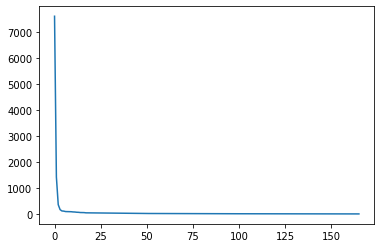

In [177]:
# Whoa!
plt.figure(121)
plt.plot(S)


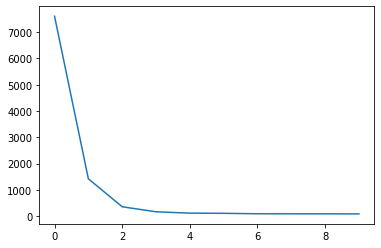

In [178]:
# let's zoom in
plt.figure(121)
plt.plot(S[:10])

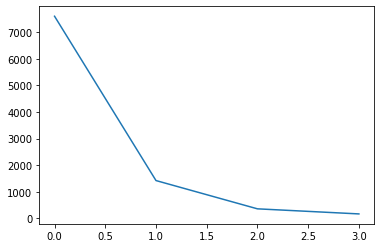

In [179]:
# let's zoom in
plt.plot(S[:4])

In [180]:
# Can we figure out by looking at V.T which the two most important features are?
len(VT[0]), VT[0]
V1 = pd.DataFrame(VT[0])

In [181]:
V1.columns

RangeIndex(start=0, stop=1, step=1)

In [182]:
V1['abs'] = [abs(x) for x in V1[0]]

In [216]:
V1.sort_values(by='abs').tail(20)

,0,abs
57,-0.002927,0.002927
52,-0.003169,0.003169
61,-0.003364,0.003364
66,-0.003369,0.003369
64,-0.004109,0.004109
3,-0.004302,0.004302
7,-0.004452,0.004452
59,-0.004555,0.004555
51,-0.005604,0.005604
38,-0.006411,0.006411


In [214]:
# 3 features that are most "representative" of the data - i.e. other columns give mostly redundant information
train_features.columns[55],train_features.columns[2],train_features.columns[5],train_features.columns[0] 

('complainant_age_incident',
 'mos_age_incident',
 'rank_abbrev_now',
 'rank_abbrev_incident')

In [185]:
# let's project onto the 3D subspace and see how well our data fits there

data_mean = train_features.mean( axis = 0)[ None ,:]
data_std = train_features.std( axis = 0)[ None ,:] + 1e-10
train_features = ( train_features - data_mean ) / data_std
# test_data = ( test_data - data_mean ) / data_std

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


In [186]:
outcome_breakdown

outcome
-1.0    12379
 0.0     7572
 1.0     6615
Name: mos_gender, dtype: int64

In [187]:
(train_target[:12379]==-1)['outcome'].sum()

12379

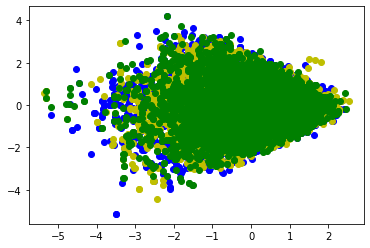

In [188]:
pc = VT [:2 , :] @ train_features.T
z = pc.T.to_numpy()
# %matplotlib notebook
fig = plt.figure(21)
# ax = fig.add_subplot(111, projection="3d")


# sorted on fado
# plt.scatter(z[:16263,0] , z[:16263,1], c ='b')
# plt.scatter ( z [16263:16263+6028 ,0] , z [16263:16263+6028 ,1], c ='y')
# plt.scatter ( z [16263+6028:16263+6028+3675 ,0] , z [16263+6028:16263+6028+3675 ,1], c ='g')
# plt.scatter ( z [16263+6028+3675:16263+6028+3675+600 ,0] , z [16263+6028+3675:16263+6028+3675+600 ,1], c ='r')


# sorted on promotion
# plt.scatter(z[:13945,0] , z[:13945,1], c ='b')
# plt.scatter ( z [13945: ,0] , z [13945: ,1], c ='y')

# sorted on outcome
plt.scatter(z[:12379,0] , z[:12379,1], c ='b')
plt.scatter ( z [12379:12379+7572 ,0] , z [12379:12379+7572 ,1], c ='y')
plt.scatter ( z [12379+7572: ,0] , z [12379+7572: ,1] , c ='g')

<IPython.core.display.Javascript object>


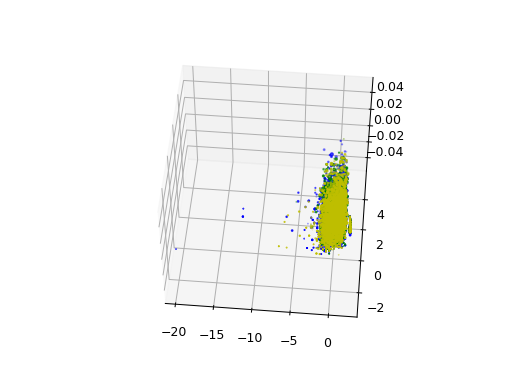

In [111]:
pc = VT [:3 , :] @ train_features.T
z = pc.T.to_numpy()
%matplotlib notebook
fig = plt.figure(21)
ax = fig.add_subplot(111, projection="3d")
plt.scatter(z[:12379,0] , z[:12379,1],z[:12379,2], c ='b')
plt.scatter ( z [12379:12379+7572 ,0] , z [12379:12379+7572 ,1],z [12379:12379+7572 ,2] , c ='y')
plt.scatter ( z [12379+7572: ,0] , z [12379+7572: ,1],z [12379+7572: ,2] , c ='g')

# plt . scatter ( z [:100 ,0] , z [:100 ,1] , c =’b’)

# p = ax.scatter(proj[:, 0], proj[:, 1], proj[:, 2],c='r')

In [98]:
# # small subset 
# keep_vars = ['mos_gender','mos_age_incident','mos_hispanic','mos_black',
#              'mos_asian','mos_american_indian','complainant_age_incident','abuse_of_authority',
#             'offensive_language','discourtesy',"c_black","c_unknown","c_white","c_asian","c_hispanic",
# "c_american_indian",
# "c_female",
# "c_male",
# "c_transman_(ftm)",
# "c_transwoman_(mtf)",
# "c_gender_non-conforming"]

In [189]:
train_features.describe()

,rank_abbrev_incident,mos_gender,mos_age_incident,same_ethnicity,promotion,rank_abbrev_now,dispute,vehicle,suspected_violation,phone,...,Premise Searched,Arrest/D. A. T.,Oriental,Sh Refuse Cmp,Slap,Police shield,White,Profane Gesture,Animal,Gender Identity
count,2.656600e+04,2.656600e+04,2.656600e+04,2.656600e+04,2.656600e+04,2.656600e+04,2.656600e+04,2.656600e+04,2.656600e+04,2.656600e+04,...,2.656600e+04,2.656600e+04,2.656600e+04,2.656600e+04,2.656600e+04,2.656600e+04,2.656600e+04,2.656600e+04,2.656600e+04,2.656600e+04
mean,4.493382e-17,-4.065441e-17,2.958143e-16,7.168014e-17,-1.128695e-16,1.925735e-17,-8.558822e-18,1.818750e-17,-2.888603e-17,-2.781617e-17,...,-9.628675e-18,3.209558e-18,-1.404182e-18,8.425091e-18,4.279411e-18,-4.814338e-18,-1.069853e-18,6.017922e-19,1.029733e-17,3.610753e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-5.093667e-01,-2.351448e-01,-2.043620e+00,-5.000376e-01,-9.513262e-01,-9.160188e-01,-2.371878e-01,-5.210137e-01,-8.015538e-01,-8.025040e-02,...,-3.069045e-02,-1.062708e-02,-6.135316e-03,-1.372002e-02,-2.212619e-02,-1.735558e-02,-1.372002e-02,-6.135316e-03,-1.062708e-02,-1.227132e-02
25%,-5.093667e-01,-2.351448e-01,-7.133378e-01,-5.000376e-01,-9.513262e-01,-9.160188e-01,-2.371878e-01,-5.210137e-01,-8.015538e-01,-8.025040e-02,...,-3.069045e-02,-1.062708e-02,-6.135316e-03,-1.372002e-02,-2.212619e-02,-1.735558e-02,-1.372002e-02,-6.135316e-03,-1.062708e-02,-1.227132e-02
50%,-5.093667e-01,-2.351448e-01,-2.144821e-01,-5.000376e-01,-9.513262e-01,-4.269133e-01,-2.371878e-01,-5.210137e-01,-8.015538e-01,-8.025040e-02,...,-3.069045e-02,-1.062708e-02,-6.135316e-03,-1.372002e-02,-2.212619e-02,-1.735558e-02,-1.372002e-02,-6.135316e-03,-1.062708e-02,-1.227132e-02
75%,2.645002e-01,-2.351448e-01,6.169442e-01,-5.000376e-01,1.051125e+00,6.219221e-02,-2.371878e-01,-5.210137e-01,1.247530e+00,-8.025040e-02,...,-3.069045e-02,-1.062708e-02,-6.135316e-03,-1.372002e-02,-2.212619e-02,-1.735558e-02,-1.372002e-02,-6.135316e-03,-1.062708e-02,-1.227132e-02
max,5.681568e+00,4.252539e+00,4.607790e+00,1.999774e+00,1.051125e+00,3.485931e+00,4.215909e+00,1.919263e+00,1.247530e+00,1.246053e+01,...,3.258220e+01,9.409570e+01,1.629847e+02,7.288347e+01,4.519360e+01,5.761619e+01,7.288347e+01,1.629847e+02,9.409570e+01,8.148773e+01


In [190]:
#train_features = train_features[keep_vars]

In [194]:
train_features.drop(['c_unknown',"c_transman_(ftm)"],axis=1,inplace=True)

In [195]:
for num, x in enumerate(train_features.columns):
    print(num, x)

0 rank_abbrev_incident
1 mos_gender
2 mos_age_incident
3 same_ethnicity
4 promotion
5 rank_abbrev_now
6 dispute
7 vehicle
8 suspected_violation
9 phone
10 warrant
11 aided_case
12 checkpoint
13 demonstrations_protests
14 report
15 disturbance
16 precinct_complaint_info
17 vehicle_violation
18 arrest_resist
19 arrest_obstruct
20 other_summons
21 Arrest/Complainant
22 C/V intervened on behalf of/observed encounter w/3rd party
23 C/V at PCT to file complaint of crime
24 Regulatory inspection
25 Assist ACS or other agency
26 CV already in custody
27 Report-gun possession/shots fired
28 Stop/Question/Frisk
29 C/V requested info from officer
30 Patrol Encounter
31 Arrest/Not Complainant
32 Summons/Complainant
33 Complainant Witnessing Incident
34 C/V at PCT to retrieve property
35 Parade/special event
36 Victim Subject of Sex Crime
37 No contact
38 Arrest - other violation/crime
39 No arrest made or summons issued
40 Assault/Arrested
41 Arrest - harrassment (against a PO)
42 Arrest on Other 

In [196]:
w_hat = la.inv(train_features.T@train_features)@train_features.T@train_target
w_hat['abs'] = [abs(x) for x in w_hat['outcome']]
w_hat.sort_values(by='abs')

,outcome,abs
15,-0.000033,0.000033
45,-0.000204,0.000204
136,0.000341,0.000341
163,-0.000664,0.000664
139,-0.000694,0.000694
...,...,...
69,-0.155801,0.155801
59,0.171362,0.171362
88,-0.230927,0.230927
57,0.332532,0.332532


In [197]:
train_features.columns[56],train_features.columns[57]

('abuse_of_authority', 'discourtesy')

In [198]:
train_features.shape

(26566, 164)

In [199]:
w_hat.shape

(164, 2)

In [200]:
train_target['outcome'].sum()

-5764.0

In [201]:
sum(train_preds)

array([-1.00641717e-13])

In [202]:
train_preds = np.array(train_features)@np.array(w_hat[['outcome']])

y_hat_encode = [-1 if x <= -0.5 
                  else 0 if x > -0.5 and x < 0.5 
                  else 1
                 for x in train_preds]
y_hat_encode = np.array(y_hat_encode)
mistakes = np.sum(y_hat_encode == np.array(train_target[['outcome']]).flatten())

error_rate = mistakes/len(train_target)

In [203]:
error_rate

0.3310999021305428

In [207]:
train_features_2 = train_features[['abuse_of_authority','discourtesy']].to_numpy()

In [211]:
train_features_2

array([[ 0.7959272 , -0.40067119],
       [-1.25634902, -0.40067119],
       [-1.25634902, -0.40067119],
       ...,
       [ 0.7959272 , -0.40067119],
       [ 0.7959272 , -0.40067119],
       [ 0.7959272 , -0.40067119]])

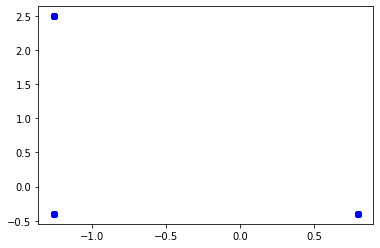

In [212]:
# plt.scatter(train_features_2[:12379,0] , train_features_2[:12379,1], c ='b')
# plt.scatter ( train_features_2 [12379:12379+7572 ,0] , train_features_2 [12379:12379+7572 ,1], c ='y')
# plt.scatter ( train_features_2 [12379+7572: ,0] , train_features_2[12379+7572: ,1] , c ='g')